## Problem

`You are owing a supermarket mall and through membership cards , you have some basic data about your customers like Customer ID, age, gender, annual income and spending score.
Spending Score is something you assign to the customer based on your defined parameters like customer behavior and purchasing data.`

`You own the mall and want to understand the customers like who can be easily converge [Target Customers] so that the sense can be given to marketing team and plan the strategy accordingly.`

## Data Loading

In [1]:
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
# data source : https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python
df = pd.read_csv('data/Mall_Customers.csv').drop('CustomerID',axis=1)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


## Data Exploration

In [2]:
# general overview of numerical features stastical properties
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd3da2f46d8>,
      dtype=object)

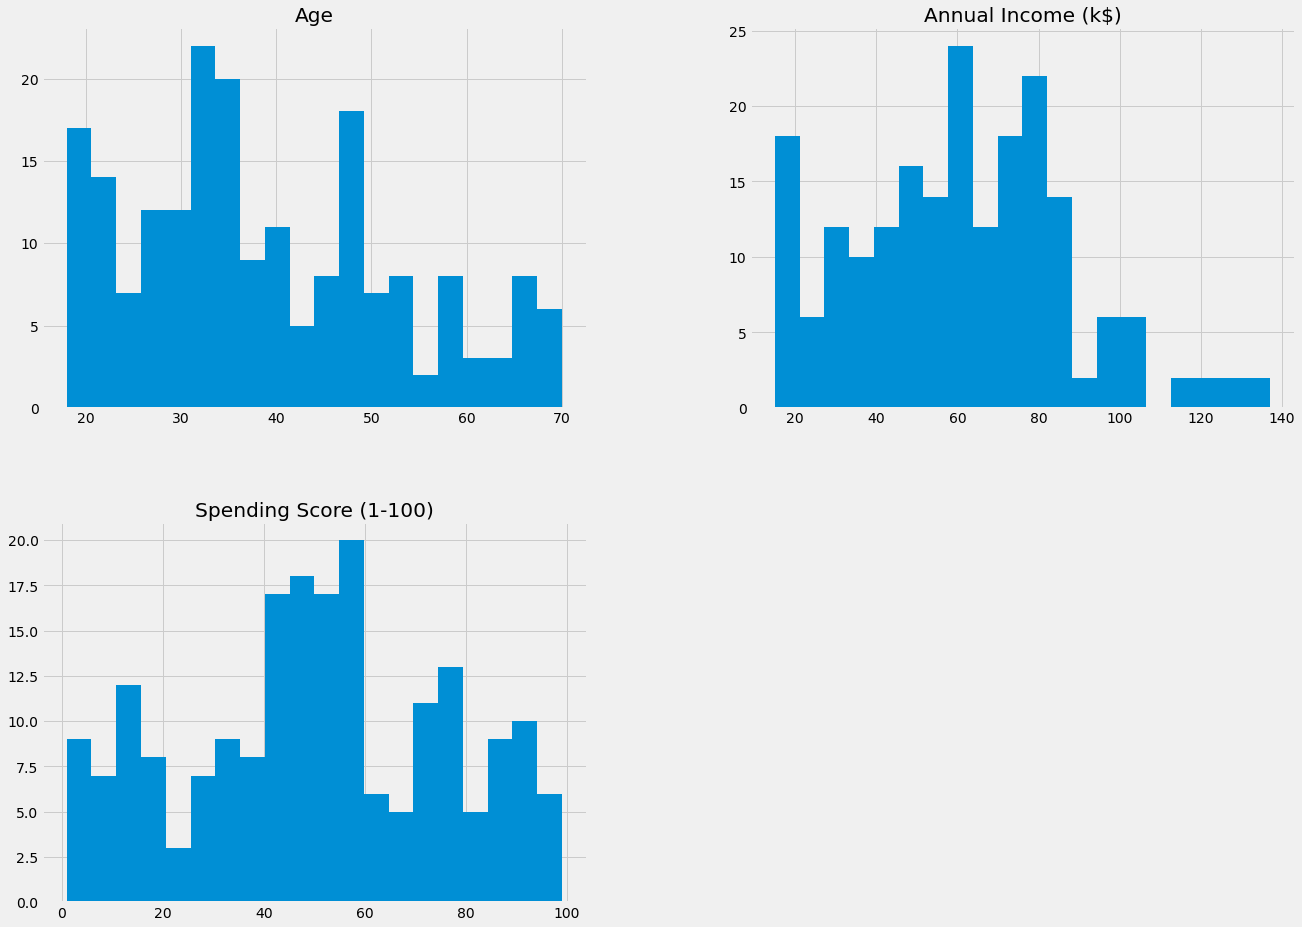

In [3]:
# numerical feature distribution
df[df.columns[1:]].hist(bins=20,figsize=(20,15)) # histogram plot

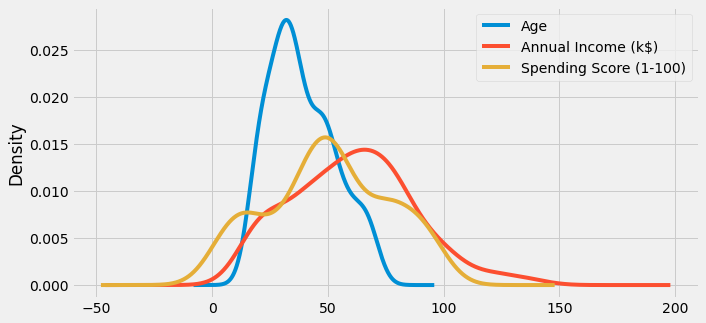

In [4]:
# density plot may reveal more about feature distributions
df[df.columns[1:]].plot.density(figsize=(10,5))

In [5]:
# data is nearly normally distributed , also need to be scaled

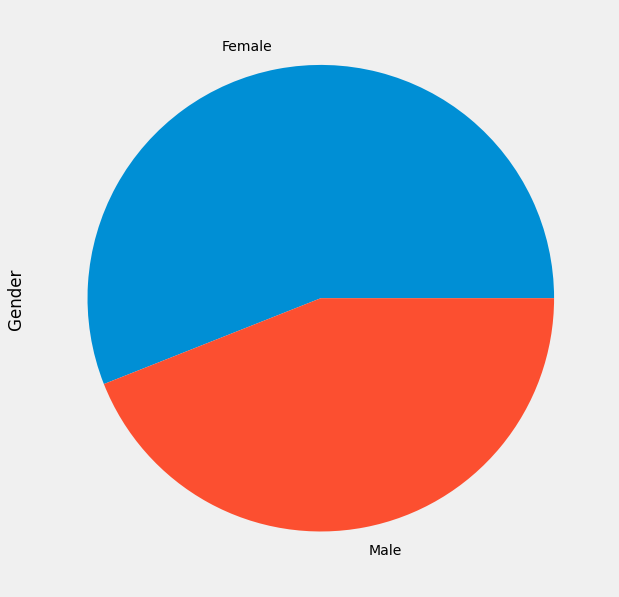

In [6]:
# explore Gender feature
df['Gender'].value_counts().plot(kind='pie',figsize=(15,10))

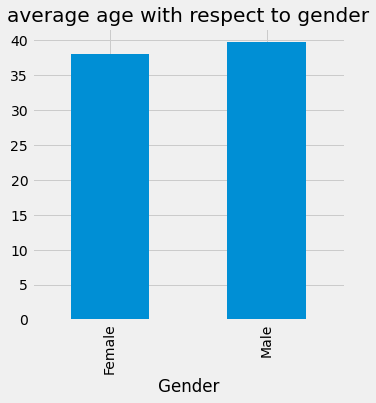

In [7]:
# explore Gender feature relation with other features
df.groupby(['Gender'])['Age'].mean().plot(kind='bar',title='average age with respect to gender',figsize=(5,5))

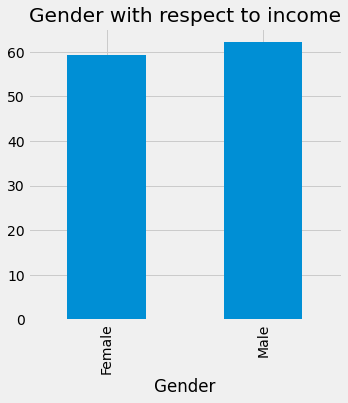

In [8]:
df.groupby(['Gender'])['Annual Income (k$)'].mean().plot(kind='bar',figsize=(5,5),title='Gender with respect to income')

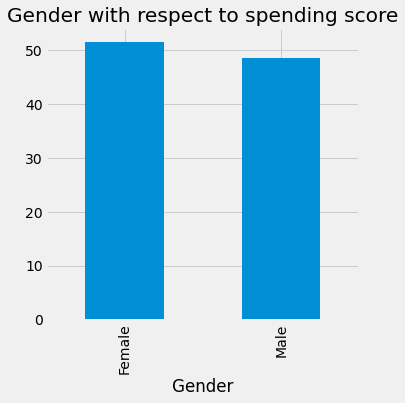

In [9]:
df.groupby(['Gender'])['Spending Score (1-100)'].mean().plot(kind='bar',figsize=(5,5),title='Gender with respect to spending score')

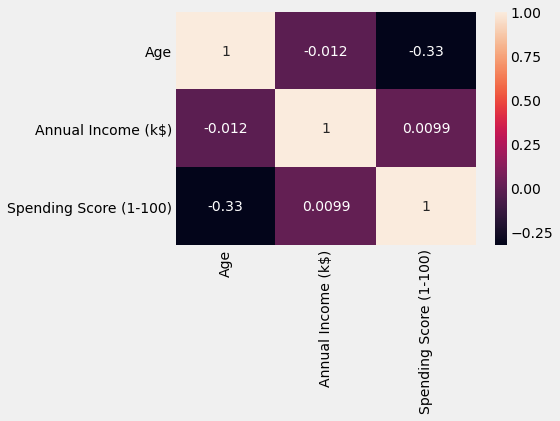

In [10]:
# explore feature correlations
sns.heatmap(df[df.columns[1:]].corr(),annot=True)

## Clustering using K- means

Text(0, 0.5, 'inertia')

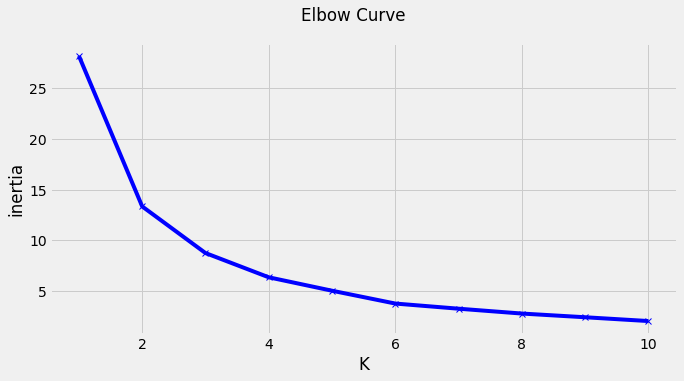

In [11]:
# Segmentation using Age and Spending Score

# first we need to know how many clusters to use
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
X1 = df[['Age' , 'Spending Score (1-100)']].iloc[: , :].values
X1 = sc.fit_transform(X1) # data scaling
inertia = []
for n in range(1 , 11):
    algorithm = KMeans(n_clusters = n)
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)

# plot k vs inertia
fig = plt.figure(figsize=(10,5))
plt.plot(list(range(1,11)),inertia,'bx-')
fig.suptitle('Elbow Curve')
plt.xlabel('K')
plt.ylabel('inertia')

Text(0, 0.5, 'Spending Score (1-100)')

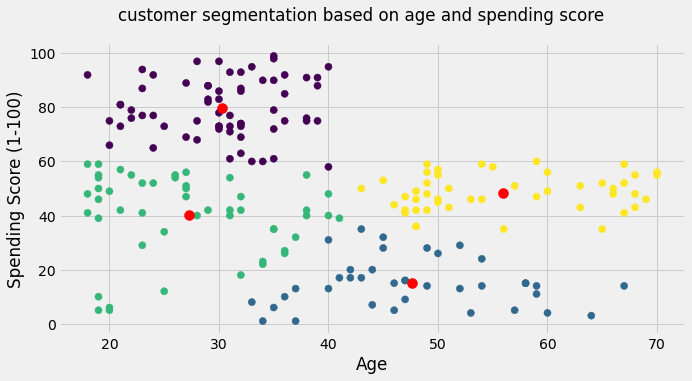

In [12]:
# k ==4 is best k , or k =5
algorithm = KMeans(n_clusters = 4)
algorithm.fit(X1) # data segmentation
clusters_preds = algorithm.predict(X1) # assign for every point in ['Age' , 'Spending Score (1-100)'] a class/cluster
X1 = sc.inverse_transform(X1) # to plot original numbers
centers = algorithm.cluster_centers_
centers = sc.inverse_transform(centers)
fig = plt.figure(figsize=(10,5))
plt.scatter(X1[:, 0], X1[:, 1], c=clusters_preds, s=50)
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=100, alpha=1)
fig.suptitle('customer segmentation based on age and spending score')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')

Text(0, 0.5, 'K')

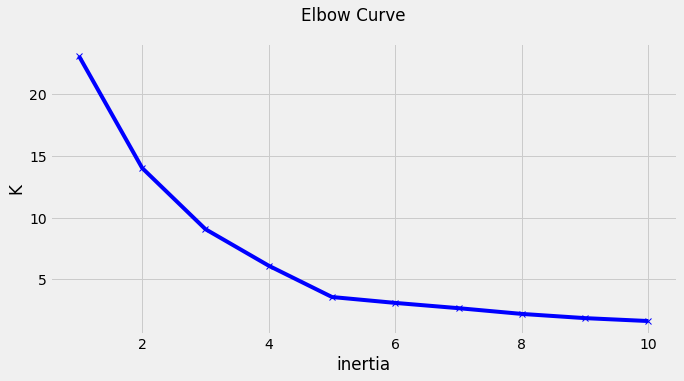

In [13]:
# Segmentation using Income and Spending Score

# first we need to know how many clusters to use
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
X2 = df[['Annual Income (k$)' , 'Spending Score (1-100)']].iloc[: , :].values
X2=sc.fit_transform(X2)
inertia = []
for n in range(1 , 11):
    algorithm = KMeans(n_clusters = n)
    algorithm.fit(X2)
    inertia.append(algorithm.inertia_)

# plot k vs inertia
fig = plt.figure(figsize=(10,5))
plt.plot(list(range(1,11)),inertia,'bx-')
fig.suptitle('Elbow Curve')
plt.xlabel('inertia')
plt.ylabel('K')

Text(0, 0.5, 'Spending Score (1-100)')

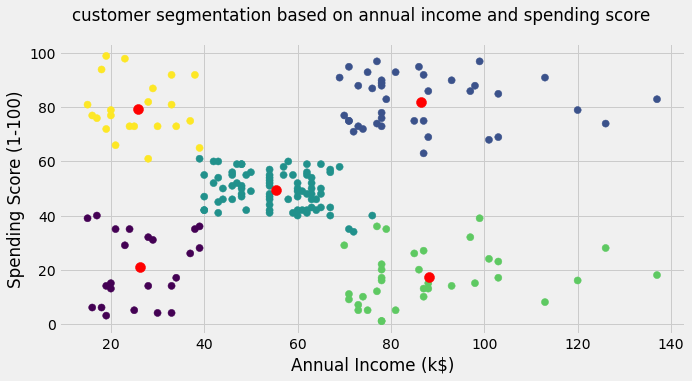

In [14]:
# k =5 is best k
algorithm = KMeans(n_clusters = 5)
algorithm.fit(X2)
clusters_preds = algorithm.predict(X2)
X2=sc.inverse_transform(X2)
centers = algorithm.cluster_centers_
centers=sc.inverse_transform(centers)
fig = plt.figure(figsize=(10,5))
plt.scatter(X2[:, 0], X2[:, 1], c=clusters_preds, s=50)
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=100, alpha=1)
fig.suptitle('customer segmentation based on annual income and spending score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')

Text(0, 0.5, 'K')

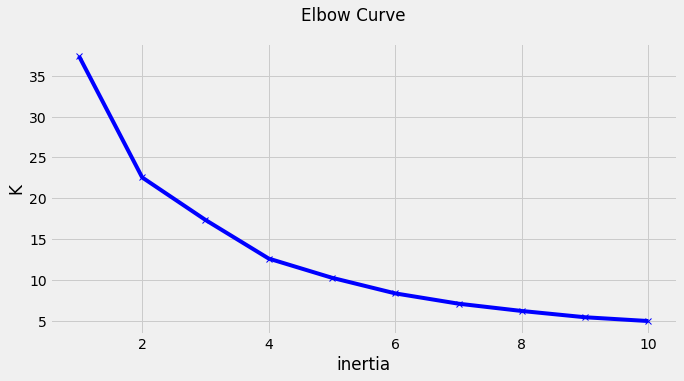

In [15]:
# .Segmentation using Age , Annual Income and Spending Score
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
X3 = df[['Annual Income (k$)' , 'Spending Score (1-100)','Age']].iloc[: , :].values
X3=sc.fit_transform(X3)
inertia = []
for n in range(1 , 11):
    algorithm = KMeans(n_clusters = n)
    algorithm.fit(X3)
    inertia.append(algorithm.inertia_)

# plot k vs inertia
fig = plt.figure(figsize=(10,5))
plt.plot(list(range(1,11)),inertia,'bx-')
fig.suptitle('Elbow Curve')
plt.xlabel('inertia')
plt.ylabel('K')

Text(0.5, 0, 'Age')

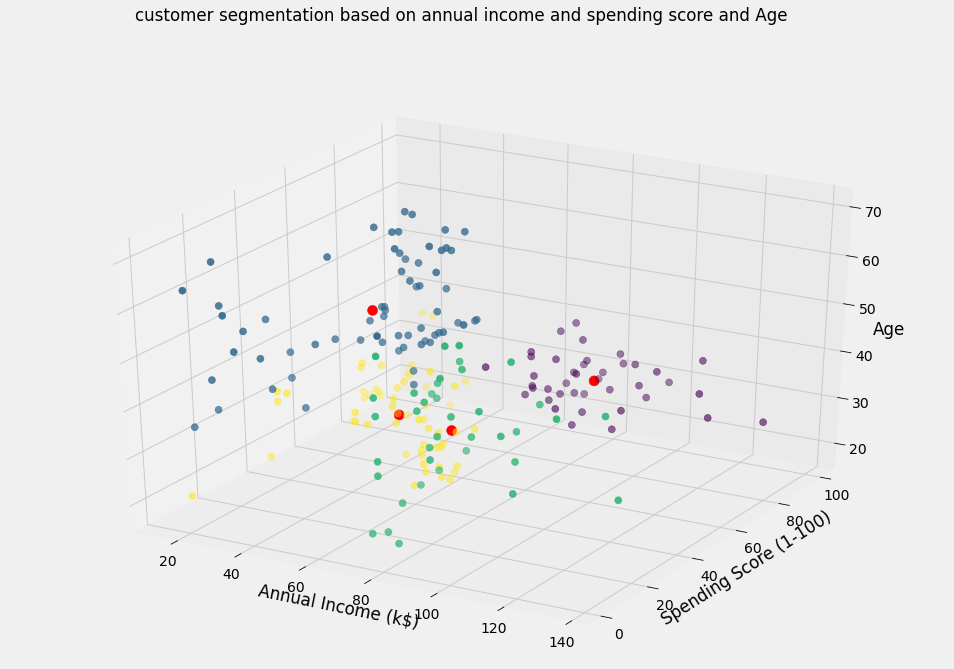

In [16]:
# k = 4 is best k
algorithm = KMeans(n_clusters = 4)
algorithm.fit(X3)
clusters_preds = algorithm.predict(X3)
X3=sc.inverse_transform(X3)
centers = algorithm.cluster_centers_
centers=sc.inverse_transform(centers)
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X3[:, 0], X3[:, 1], X3[:,2],c=clusters_preds, s=50)
ax.scatter(centers[:, 0], centers[:, 1], centers[:,2],c='red', s=100, alpha=1)
fig.suptitle('customer segmentation based on annual income and spending score and Age')
ax.set_xlabel('Annual Income (k$)')
ax.set_ylabel('Spending Score (1-100)')
ax.set_zlabel('Age')

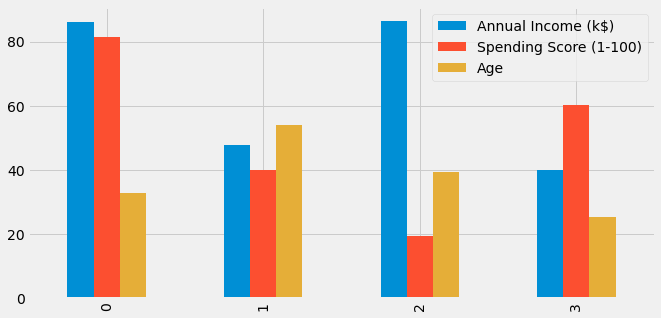

In [22]:
# this plot illustrates more clusters between ['Annual Income (k$)' , 'Spending Score (1-100)','Age']
cents=pd.DataFrame(centers)
cents.columns=['Annual Income (k$)' , 'Spending Score (1-100)','Age']
cents.plot(kind='bar',figsize=(10,5))

In [ ]:
# assignment dataset
# https://www.kaggle.com/arjunbhasin2013/ccdata